In [475]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [422]:
df = pd.read_csv("data.csv")
print(df.head(2))

   CustomerID  Age Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49   Male       4           88.35  Month-to-Month   
1           2   43   Male       0           36.67  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic         353.4         Yes   Yes  
1     Fiber Optic           0.0         Yes   Yes  


In [423]:
#collecting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [424]:
# missing values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [425]:
# filling the null values
df["InternetService"] = df["InternetService"].fillna("")
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [426]:
df.duplicated().sum()

np.int64(0)

In [427]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [428]:
# now I would be interested in correlation of these values
numeric_columns_data = df.select_dtypes(include=["number"])
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


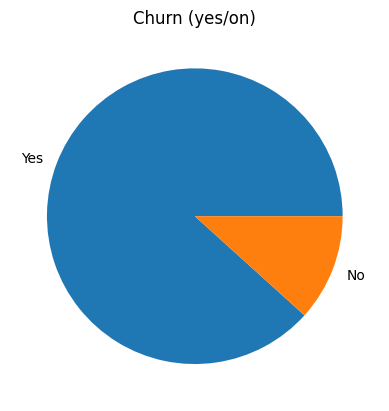

In [429]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn (yes/on)")
plt.ylabel("")
plt.show()

In [430]:
# grouping by churn and get the value the mean of monthlycharges 
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [431]:
# curious about how churn happens with gender
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [432]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [433]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

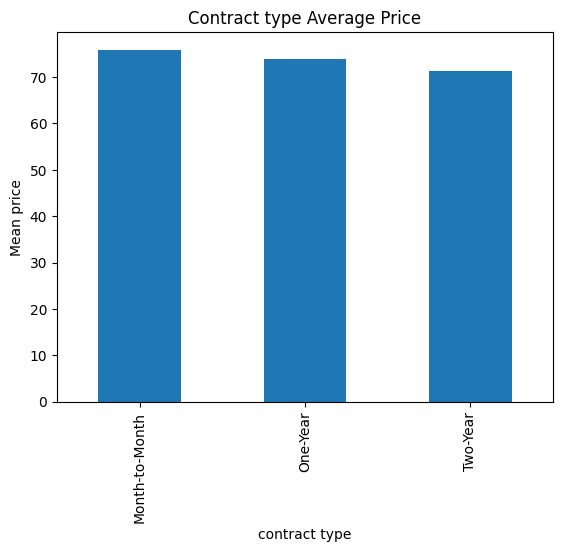

In [434]:
# monthly charges decreases with increament of the contract time
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean price")
plt.xlabel("contract type")
plt.title("Contract type Average Price")
plt.show()

In [435]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


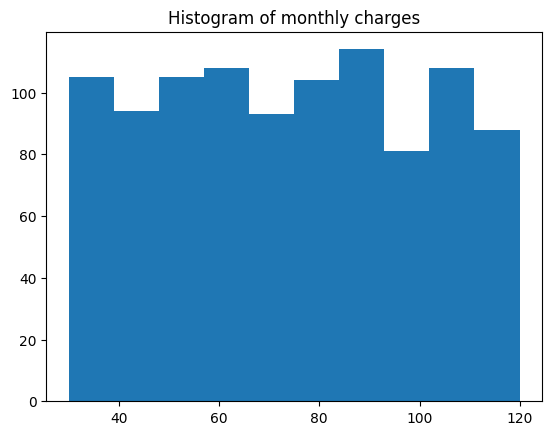

In [436]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of monthly charges")
plt.show()

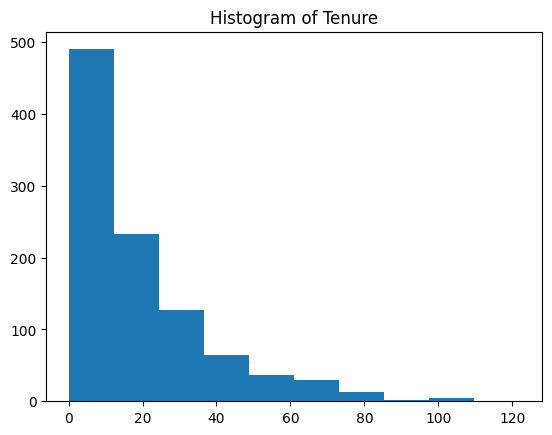

In [437]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

* Starting the feature engineering

In [438]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [439]:
y = df[["Churn"]]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [440]:
y.head()
# y["Churn"].unique()

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [441]:
# we need all values in numeric format for prediction
mapping = {"Female":1, "Male":0}
x["Gender"]=x["Gender"].map(mapping)

C:\Users\banig\AppData\Local\Temp\ipykernel_6560\956959229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"]=x["Gender"].map(mapping)


In [442]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [443]:

y["Churn"]=y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)
y["Churn"].unique()

C:\Users\banig\AppData\Local\Temp\ipykernel_6560\907273524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"]=y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)


array([1, 0])

In [444]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42, stratify=y )
# y_train["Churn"].unique()

In [445]:
# since the values of the attributes are in different range, we need to scale them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [446]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = y_train["Churn"]
y_test = y_test["Churn"]

In [447]:
y_train

270    1
938    1
329    1
886    1
769    1
      ..
436    1
933    1
209    1
550    1
783    1
Name: Churn, Length: 800, dtype: int64

In [ ]:
# as we have seen dataset is highly imbalance,
# we will use SMOTE to reduce the effect of less minority
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# x_train_bl, y_train_bl = smote.fit_resample(x_train,y_train)



# over sampling did not work well as per the model performance score



* Model development

In [448]:
from sklearn.metrics import accuracy_score

def performance_score(prediction):
    print("The accuracy of the model is {}".format(accuracy_score(y_test,prediction)))

* Logistic Regression

In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [450]:
pred_model = LogisticRegression()
pred_model.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [451]:
prediction = pred_model.predict(x_test)
performance_score(prediction)

The accuracy of the model is 0.875


* K-NN classifier

In [452]:
from sklearn.neighbors import KNeighborsClassifier

In [453]:
param_grid = {
    "n_neighbors":[2,3,4,7,9],
    "weights": ["uniform","distance"],
}

In [455]:
gridknn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
gridknn.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [456]:
prediction = gridknn.best_estimator_.predict(x_test)
performance_score(prediction)

The accuracy of the model is 0.87


* SVM classifier

In [457]:
from sklearn.svm import SVC
svm = SVC()

In [460]:
param_grid = {
    "C":[0.01,0.1,.5,1.0],
    "kernel": ["linear","rbf","poly"]
}

In [464]:
gridsvm = GridSearchCV(svm,param_grid,cv = 5)
gridsvm.fit(x_train,y_train)
gridsvm.best_params_


{'C': 0.01, 'kernel': 'linear'}

In [463]:
prediction = gridsvm.best_estimator_.predict(x_test)
performance_score(prediction)

The accuracy of the model is 0.885


* Decision Tree

In [465]:
from sklearn.tree import DecisionTreeClassifier

In [466]:
param_grid = {
    "criterion":["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [467]:
gridtree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)
gridtree.fit(x_train,y_train)
gridtree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [468]:
predict = gridtree.best_estimator_.predict(x_test)
performance_score(predict)

The accuracy of the model is 0.82


* Random Forest

In [469]:
from sklearn.ensemble import RandomForestClassifier

In [471]:
param_grid = {
    "n_estimators":[5,10,20,40],
    "max_depth" : [5,10,14],
    "max_features" : [2,3,4],
    "bootstrap" : [True,False]

}

In [472]:
gridrf = GridSearchCV(RandomForestClassifier(),param_grid, cv =5)
gridrf.fit(x_train,y_train)
gridrf.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 2, 'n_estimators': 10}

In [473]:
predict = gridrf.best_estimator_.predict(x_test)
performance_score(predict)

The accuracy of the model is 0.885


* Picking up best model

In [476]:
best_model = gridsvm.best_estimator_
with open("bestmodel.pkl","wb") as f:
    pickle.dump(best_model,f)